https://leedakyeong.tistory.com/entry/Python-albumentations-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-Image-Agumentation

In [1]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import os
import numpy as np
from PIL import Image
import glob

In [2]:
images=glob.glob('.\data\*.png')
bboxes=glob.glob('.\data\*.txt')

images=np.array(images).tolist()
bboxes=np.array(bboxes).tolist()

hap=np.stack((images,bboxes),axis=0)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def myfig(image,label):
    fig ,ax=plt.subplots()
    ax.imshow(image)
    
    if len(label)>0:
        dw=image.shape[0]
        dh=image.shape[1]
        
        x1=(label[0][0]-label[0][2]/2)*dw# x_center-h 전체사이즈-바운드사이즈 가로여백)
        y1=(label[0][1]-label[0][3]/2)*dh# 세로여백
        
        w=label[0][2] * dw# w*image 가로 label[0][2]->object width/image with *image width =object width
        h=label[0][3] * dh# h*image 세로 object height
        
        rect=patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor='r', facecolor='none')# (x1,y1)은 가로 좌측 아래 모서리        
        ax.add_patch(rect)
        
plt.show()

In [4]:
def agumentation_albumentations(hap):
    for i in range(len(hap[0])):
        image=cv2.imread(hap[0][i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        bboxes=np.loadtxt(fname=hap[1][i], delimiter=" ",ndmin=2)
        bboxes=np.roll(bboxes,4, axis=1).tolist()

        IMAGE_SIZE= 500
        train_transform = A.Compose([
            A.VerticalFlip(p=1)
        ],bbox_params=A.BboxParams(format='yolo', min_visibility=0.4, label_fields=[]))

        transformed=train_transform(image=image, bboxes=bboxes)
        transformed_image=transformed['image']
        transformed_bboxes=transformed['bboxes']
        if i<=10:
            myfig(transformed_image,transformed_bboxes)
        transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)#저장은 바꿔서 해야 원래대로 저장됨
        transformed_bboxes=np.roll(transformed_bboxes,1, axis=1).tolist()#class을 처음으로 오게 변환
        
        cv2.imwrite(f"./trans1/{i+1}.png",transformed_image)
        np.savetxt(f'./trans1/{i+1}.txt', transformed_bboxes, delimiter=' ')

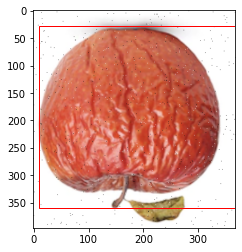

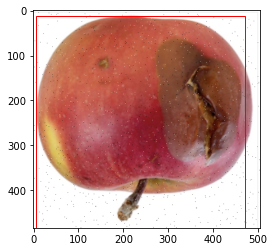

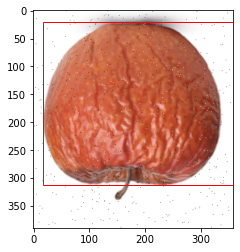

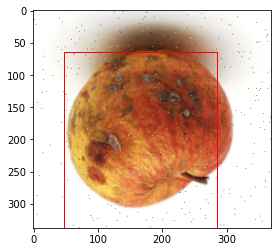

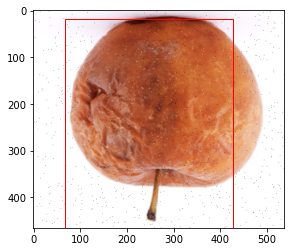

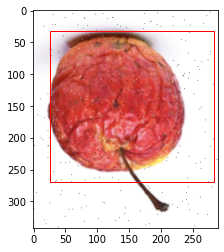

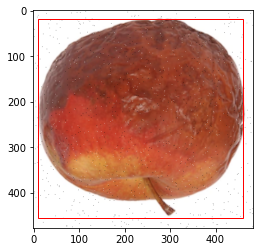

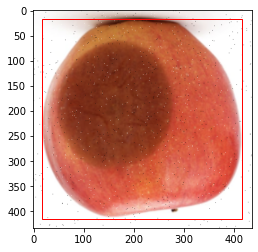

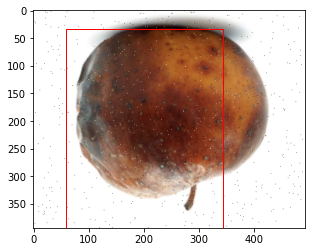

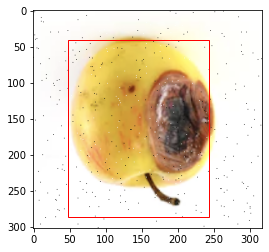

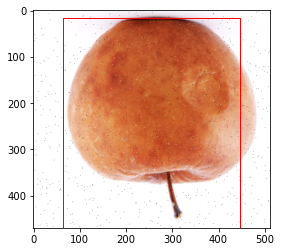

In [5]:
agumentation_albumentations(hap)#labeling하는 프로그램에 넣어서 교차검증해봐야할듯  bbox가깨짐